<a href="https://colab.research.google.com/github/naylorstone/DS3001-Final-Project/blob/main/avery.decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# load in packages
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
# load data

df = pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# rename columns
df.rename(columns={'OverallQual': 'Overall_Quality'}, inplace=True)
df.rename(columns={'OverallCond': 'Overall_Condition'}, inplace=True)

In [16]:
from sklearn.tree import plot_tree

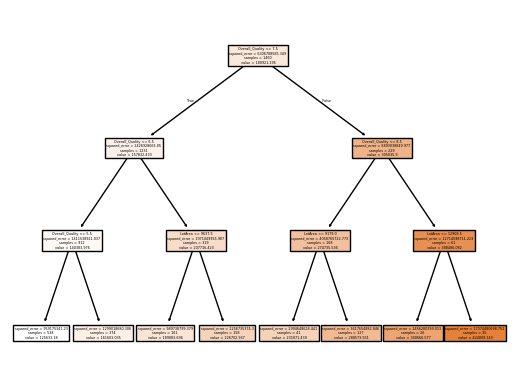

<Figure size 2000x2000 with 0 Axes>

In [27]:
# Process data:
y = df['SalePrice']
vars = ['Overall_Quality','Overall_Condition','LotArea']

# load train / test split
X_train = X = pd.concat([df.loc[:,vars]],axis=1)
X_test = pd.read_csv("/content/test.csv")

X_test.rename(columns={'OverallQual': 'Overall_Quality'}, inplace=True)
X_test.rename(columns={'OverallCond': 'Overall_Condition'}, inplace=True)
X_test = X_test.loc[:, vars]

y_train = df['SalePrice']
y_test = pd.read_csv("/content/test.csv")

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression
var_names = cart.feature_names_in_

# Visualize results:
plot_tree(cart,filled=True,feature_names=var_names)
plt.figure(figsize=(20,20))
plt.show()

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)